In [2]:
import torch
from torch import nn
from config import config as cfg


In [122]:
import torch
from torch import nn
from config import config as cfg
import numpy as np

class seperate_bbox_model(nn.Module):
    """Some Information about seperate_model"""
    def __init__(self):
        super(seperate_bbox_model, self).__init__()

        self.bbox_encoder = seperate_model_bbox_encoder()
        self.bbox_decoder = seperate_model_bbox_decoder()

    def forward(self, bbox = None):


        result_bbox = self.bbox_encoder(bbox)
        result_bbox = self.bbox_decoder(result_bbox)
        
        #self.bbox_ratio, self.flow_ratio, self.ego_ratio = (self.bbox_ratio)/(self.bbox_ratio+self.flow_ratio+self.ego_ratio), (self.flow_ratio)/(self.bbox_ratio+self.flow_ratio+self.ego_ratio), (self.ego_ratio)/(self.bbox_ratio+self.flow_ratio+self.ego_ratio)
        return result_bbox
    
class seperate_model_bbox_encoder(nn.Module):
    """Some Information about seperate_model_bbox_encoder"""
    def __init__(self):
        super(seperate_model_bbox_encoder, self).__init__()

        self.layer = nn.Sequential(
            nn.GRUCell(4, cfg.feature_space)
        )

    def forward(self, x, hidden_state = None): # (B, T, 4)
        if hidden_state == None:
            hidden_state = torch.randn(cfg.sequence, cfg.feature_space)
        for index in range(x.shape[1]):
            hidden_state = self.layer(x[:,index, :])
        return hidden_state
    
class seperate_model_bbox_decoder(nn.Module):
    """Some Information about seperate_model_bbox_encoder"""
    def __init__(self):
        super(seperate_model_bbox_decoder, self).__init__()

        self.layer = nn.Sequential(
            nn.Linear(cfg.feature_space, 128),
            nn.ReLU(),
            nn.Linear(128, 4),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layer(x)
    
###############################################################
    
class seperate_flow_model(nn.Module):
    """Some Information about seperate_model"""
    def __init__(self):
        super(seperate_flow_model, self).__init__()
        self.flow_encoder = seperate_model_flow_encoder()
        self.flow_decoder = seperate_model_flow_decoder()

    def forward(self, flow = None):

        result_flow = self.flow_encoder(flow)
        result_flow = self.flow_decoder(result_flow)

        return result_flow
        #self.bbox_ratio, self.flow_ratio, self.ego_ratio = (self.bbox_ratio)/(self.bbox_ratio+self.flow_ratio+self.ego_ratio), (self.flow_ratio)/(self.bbox_ratio+self.flow_ratio+self.ego_ratio), (self.ego_ratio)/(self.bbox_ratio+self.flow_ratio+self.ego_ratio)

class seperate_model_flow_encoder(nn.Module):
    """Some Information about seperate_model_flow_encoder"""
    def __init__(self):
        super(seperate_model_flow_encoder, self).__init__()

        self.layer = nn.Sequential(
            nn.GRUCell(2, cfg.feature_space)
        )
    def forward(self, x, hidden_state = None):
        if hidden_state == None:
            hidden_state = torch.randn(cfg.sequence, cfg.feature_space)
        for index in range(x.shape[1]):
            hidden_state = self.layer(x[:,index, :])
        return hidden_state
    
class seperate_model_flow_decoder(nn.Module):
    """Some Information about seperate_model_flow_encoder"""
    def __init__(self):
        super(seperate_model_flow_decoder, self).__init__()

        self.layer = nn.Sequential(
            nn.Linear(cfg.feature_space, 128),
            nn.ReLU(),
            nn.Linear(128, 2),
            nn.Tanh(),
            nn.Linear(2,2)
        )

    def forward(self, x):
        return self.layer(x)
    
##################################################################################

        return result_flow
class seperate_ego_model(nn.Module):
    """Some Information about seperate_model"""
    def __init__(self):
        super(seperate_ego_model, self).__init__()

        self.ego_encoder = seperate_model_ego_encoder()
        self.ego_decoder = seperate_model_ego_decoder()


    def forward(self, ego = None):

        result_ego = self.ego_encoder(ego)
        result_ego = self.ego_decoder(result_ego)
        
        #self.bbox_ratio, self.flow_ratio, self.ego_ratio = (self.bbox_ratio)/(self.bbox_ratio+self.flow_ratio+self.ego_ratio), (self.flow_ratio)/(self.bbox_ratio+self.flow_ratio+self.ego_ratio), (self.ego_ratio)/(self.bbox_ratio+self.flow_ratio+self.ego_ratio)

        return result_ego
    
class seperate_model_ego_encoder(nn.Module):
    """Some Information about seperate_model_ego_encoder"""
    def __init__(self):
        super(seperate_model_ego_encoder, self).__init__()
        self.layer = nn.Sequential(
            nn.GRUCell(3, cfg.feature_space)
        )
    def forward(self, x, hidden_state = None):
        if hidden_state == None:
            hidden_state = torch.randn(cfg.sequence, cfg.feature_space)
        for index in range(x.shape[1]):
            hidden_state = self.layer(x[:,index, :])
        return hidden_state
    
class seperate_model_ego_decoder(nn.Module):
    """Some Information about seperate_model_ego_encoder"""
    def __init__(self):
        super(seperate_model_ego_decoder, self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(cfg.feature_space, 128),
            nn.ReLU(),
            nn.Linear(128, 3),
            nn.Tanh()
        )

        self.pi = np.pi
    def forward(self, x):
        return self.pi * self.layer(x)

In [125]:
model = seperate_ego_model()

In [126]:
test_bbox = torch.randn((64, 16, 4))
#test_bbox = None
test_flow = torch.randn((64, 16, 2))
#test_flow = None
test_ego = torch.randn((64, 16, 3))
#test_ego = None


result = model(test_ego)
print(result.shape)

torch.Size([64, 3])


In [110]:
print(r_e.shape)

torch.Size([64, 2])


In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
test_number = np.arange(-1 * np.pi, np.pi, 0.001)

In [13]:
for instance in test_number:
    plt.plot(instance, np.arctan2(instance))
plt.show()

TypeError: arctan2() takes from 2 to 3 positional arguments but 1 were given

In [1]:
from networks import seperate_autoencoder_model as sam

In [6]:
flow_model = sam.flow_model()
bbox_model = sam.bbox_model()
ego_model = sam.ego_model()

base_model = sam.model()

In [20]:
base_dict = base_model.state_dict()

flow_dict = flow_model.state_dict()
bbox_dict = bbox_model.state_dict()
ego_dict = ego_model.state_dict()

print(flow_dict.keys())

odict_keys(['flow_encoder.layer.0.weight_ih', 'flow_encoder.layer.0.weight_hh', 'flow_encoder.layer.0.bias_ih', 'flow_encoder.layer.0.bias_hh', 'flow_decoder.layer.0.weight', 'flow_decoder.layer.0.bias', 'flow_decoder.layer.2.weight', 'flow_decoder.layer.2.bias', 'flow_decoder.layer.4.weight', 'flow_decoder.layer.4.bias'])


In [21]:
flow_dict = {k: v for k, v in flow_dict.items() if k in base_dict}
bbox_dict = {k: v for k, v in bbox_dict.items() if k in base_dict}
ego_dict = {k: v for k, v in ego_dict.items() if k in base_dict}

In [18]:
base_dict['bbox_encoder.layer.0.weight_ih']

tensor([[ 0.0418,  0.0403, -0.0074, -0.0216],
        [ 0.0199,  0.0209, -0.0180,  0.0058],
        [-0.0315, -0.0130,  0.0020,  0.0108],
        ...,
        [-0.0258, -0.0141, -0.0061, -0.0348],
        [ 0.0327,  0.0022, -0.0162, -0.0335],
        [ 0.0299,  0.0206,  0.0011,  0.0027]])

In [24]:
base_dict.update(flow_dict)
base_dict.update(bbox_dict)
base_dict.update(ego_dict)

In [25]:
base_dict['bbox_encoder.layer.0.weight_ih']

tensor([[-0.0150, -0.0079, -0.0359, -0.0277],
        [-0.0166, -0.0282,  0.0420,  0.0044],
        [ 0.0300,  0.0050, -0.0034,  0.0384],
        ...,
        [ 0.0372,  0.0333, -0.0285,  0.0290],
        [ 0.0342, -0.0418, -0.0048,  0.0441],
        [ 0.0207, -0.0098, -0.0426, -0.0423]])

In [26]:
base_model.load_state_dict(base_dict)

<All keys matched successfully>

In [27]:
bbox_dict['bbox_encoder.layer.0.weight_ih']

tensor([[-0.0150, -0.0079, -0.0359, -0.0277],
        [-0.0166, -0.0282,  0.0420,  0.0044],
        [ 0.0300,  0.0050, -0.0034,  0.0384],
        ...,
        [ 0.0372,  0.0333, -0.0285,  0.0290],
        [ 0.0342, -0.0418, -0.0048,  0.0441],
        [ 0.0207, -0.0098, -0.0426, -0.0423]])

In [31]:
import torch
from torch import nn

In [41]:
embedding = nn.Embedding(10, 3)

# [1, 2, 4, 5], [4, 3, 2, 9]에 대한 임베딩 값 구하기
input = torch.randn(50,50, dtype = torch.int)
print(input.shape)
print(embedding(input).shape)

torch.Size([50, 50])


RuntimeError: Expected tensor for argument #1 'indices' to have one of the following scalar types: Long, Int; but got torch.FloatTensor instead (while checking arguments for embedding)

In [ ]:
out.shape

torch.Size([10, 32, 512])

In [43]:
import networks.seperate_autoencoder_model as sam

In [44]:
a = sam.model()

In [45]:
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp

In [52]:
a = sam.model()

get_n_params(a)

2382336

In [53]:
a.parameters

<bound method Module.parameters of model(
  (bbox_encoder): model_bbox_encoder(
    (layer): Sequential(
      (0): GRUCell(4, 512)
    )
  )
  (flow_encoder): model_flow_encoder(
    (layer): Sequential(
      (0): GRUCell(2, 512)
    )
  )
  (ego_encoder): model_ego_encoder(
    (layer): Sequential(
      (0): GRUCell(3, 512)
    )
  )
)>

In [66]:
a = torch.randn((3,3))

In [60]:
print(a*0)

tensor([[-0., 0., -0.],
        [0., -0., -0.],
        [-0., -0., -0.]])


In [61]:
a = torch.zeros((3,3))
print(a.device)

cpu


In [64]:
a = a.to('cuda')
print(a.device)

cuda:0


In [67]:
print(a)

tensor([[-1.2846, -0.1635, -0.1551],
        [ 0.1182, -1.0292,  0.3110],
        [-0.3013, -0.1529, -1.1527]])


In [68]:
print(a+a)

tensor([[-2.5692, -0.3271, -0.3101],
        [ 0.2364, -2.0584,  0.6221],
        [-0.6026, -0.3058, -2.3054]])


In [16]:
import torch
from utils.args import parse_args

In [21]:
from config.model_config import * 
import os
import numpy as np
import pickle as pkl
import glob
import torch
from torch.utils import data
import json

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class PRETRAIN_DATASET(data.Dataset):
    def __init__(self, args, phase):
        '''
        HEV-I dataset object. Contains bbox, flow and ego motion.
        
        Params:
            args: arguments passed from main file
            phase: 'train' or 'val'
        '''
        self.args = args
        self.data_root = os.path.join(self.args['data_root'], phase)
        self.video_name = os.listdir(self.data_root)
        
        self.sessions = glob.glob(os.path.join(self.data_root,'*'))

        self.all_inputs = []
        for name in self.video_name:
            # for each car in dataset, we split to several trainig samples
            
            #load data and label
            data_path = os.path.join(self.data_root, name)
            try:
                label_path = os.path.join(self.label_root, name + '.json')
                label = json.load(open(label_path, 'rb'))
                labels = label["labels"] #[frame]['accident_id']
            except:
                labels = None
            data = pkl.load(open(data_path, 'rb'))
            
            bbox = data['bbox']
            flow = data['flow']
            ego_motion = data['ego_motion']# [yaw, x, z]
            
            # frame_id = data['frame_id']

            # go farwad along the session to get data samples
            seed = np.random.randint(self.args['seed_max'])
            for start in range(seed, len(flow), int(self.args['segment_len']/2)):

                end = start + self.args['segment_len']
                if end + self.args['pred_timesteps'] <= len(bbox) and end <= len(flow):
                    input_bbox = bbox[start:end,:]
                    input_flow = flow[start:end,:,:,:]
                    input_ego_motion = self.get_input(ego_motion, start, end)
                    
                    target_bbox = self.get_target(bbox, start, end)
                    target_flow = self.get_target(flow, start, end)
                    target_ego_motion = self.get_target(ego_motion, start, end)
                    
                    # target_ego_motion = self.get_target(ego_motion_session, ego_start, ego_end)
                    # if input_flow.shape[0] != 16:
                    #     print(flow.shape)
                    #     print(bbox.shape)
                    #     print(input_flow.shape)
                    #     print("start: {} end:{} length:{}".format(start, end, self.args.segment_len))
                    
                    self.all_inputs.append([input_bbox, input_flow, input_ego_motion, target_bbox, target_flow, target_ego_motion])
            
            # go backward along the session to get data samples again
            seed = np.random.randint(self.args['seed_max'])
            for end in range(min([len(bbox)-self.args['pred_timesteps'], len(flow)]), 
                             seed, 
                             -self.args['segment_len']):

                start = end - self.args['segment_len']
                if start >= 0:
                    input_bbox = bbox[start:end,:]
                    input_flow = flow[start:end,:,:,:]
                    input_ego_motion = self.get_input(ego_motion, start, end)

                    target_flow = self.get_target(flow, start, end)
                    target_bbox = self.get_target(bbox, start, end)
                    target_ego_motion = self.get_target(ego_motion, start, end)
                    
                    # if input_flow.shape[0] != 16:
                    #     print(flow.shape)
                    #     print(bbox.shape)
                    #     print(input_flow.shape)
                    #     print("start: {} end:{} length:{}".format(start, end, self.args.segment_len))
                    self.all_inputs.append([input_bbox, input_flow, input_ego_motion, target_bbox, target_flow, target_ego_motion])

    def get_input(self, ego_motion_session, start, end):
        '''
        The input to a ego motion prediction model at time t is 
            its difference from the previous step: X_t - x_{t-1}
        '''
        return torch.as_tensor(ego_motion_session[start:end, :], dtype = torch.float32)

    def get_target(self, session, _, end):
        '''
        Given the input session and the start and end time of the input clip, find the target
        TARGET FOR PREDICTION IS THE CHANGES IN THE FUTURE!!
        Params:
            session: the input time sequence of a car, can be bbox or ego_motion with shape (time, :)
            start: start frame id 
            end: end frame id
        Returns:
            target: Target tensor with shape (self.args.segment_len, pred_timesteps, :)
                    The target is the change of the values. e.g. target of yaw is \delta{\theta}_{t0,tn} 
        ''' 
        #target = torch.zeros(self.args['segment_len'], self.args['pred_timesteps'], session.shape[-1])
        target = torch.as_tensor(session[end + 1,:], dtype=torch.float32)

        #for i, target_start in enumerate(range(start, end)):
        #    '''the target of time t is the change of bbox/ego motion at times [t+1,...,t+5}'''
        #    target_start = target_start + 1
        #    try:
        #        target[i,:,:] = torch.as_tensor(session[target_start:target_start+self.args['pred_timesteps'],:] - 
        #                                    session[target_start-1:target_start,:])
        #    except:
        #        print("segment start: ", start)
        #        print("sample start: ", target_start)
        #        print("segment end: ", end)
        #        print(session.shape)
        #        raise ValueError()
        return target

    def __len__(self):
        return len(self.all_inputs)
    
    def __getitem__(self, index):
        input_bbox, input_flow, input_ego_motion, target_bbox, target_flow, target_ego_motion= self.all_inputs[index]
        input_bbox = torch.FloatTensor(input_bbox).to(device)
        input_flow = torch.FloatTensor(input_flow).to(device)
        input_ego_motion = torch.FloatTensor(input_ego_motion).to(device)

        target_bbox = torch.FloatTensor(target_bbox).to(device)
        target_flow = torch.FloatTensor(target_flow).to(device)
        target_ego_motion = torch.FloatTensor(target_ego_motion).to(device)

        return input_bbox, input_flow, input_ego_motion, target_bbox, target_flow, target_ego_motion

In [19]:
args = parse_args()
dataloader_params ={
"batch_size": args['batch_size'],
"shuffle": args['shuffle'],
"num_workers": args['num_workers']
}

In [22]:
val_dataset = PRETRAIN_DATASET(args, 'val')
val_gen = torch.utils.data.DataLoader(val_dataset, **dataloader_params)

In [30]:
for data in val_gen:
    break

In [31]:
for i in range(6):
    print(data[i].shape)

torch.Size([32, 16, 4])
torch.Size([32, 16, 5, 5, 2])
torch.Size([32, 16, 3])
torch.Size([32, 4])
torch.Size([32, 5, 5, 2])
torch.Size([32, 3])


In [32]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def rec_plot(s, eps=None, steps = None):
    if eps == None: eps = 0.01
    if steps == None: steps = 255

    N = s.size
    S = np.repeat(s[None,:], N, axis = 0)
    Z = np.floor(np.abs(S-S.T)/eps)
    Z[Z>steps] = steps
    
    return Z

In [27]:
path = 'media/DATA/HEVI_dataset/fol_data/train/201806061148004336_7.pkl'

data = pkl.load(open(path, 'rb'))

bbox = data['bbox']
flow = data['flow']
ego = data['ego_motion']

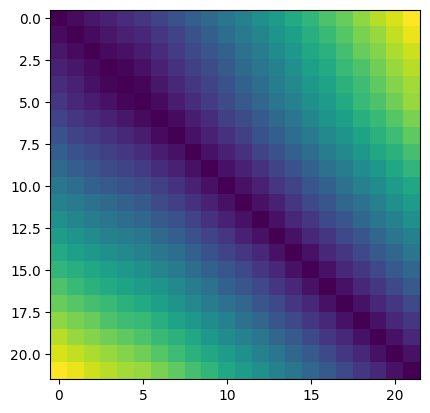

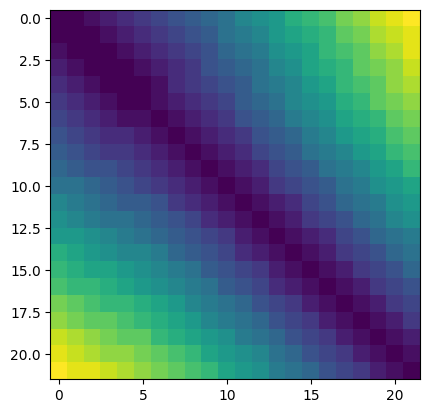

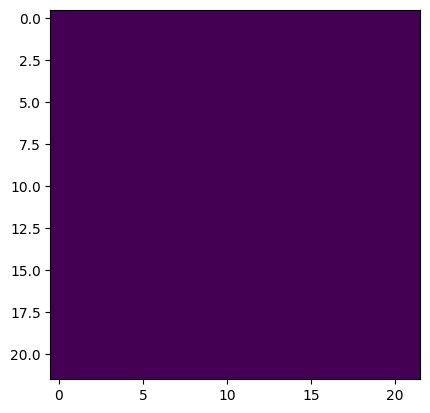

In [5]:
#image = rec_plot(bbox[:,3])
#plt.imshow(image)
#plt.show()

image = rec_plot(ego[:,2])
plt.imshow(image)
plt.show()

image = rec_plot(ego[:,1])
plt.imshow(image)
plt.show()

image = rec_plot(ego[:,0])
plt.imshow(image)
plt.show()

In [94]:
test = np.random.randn(20)
print(test)

[-0.86127612 -0.29114358 -0.69851473  1.18998442 -2.10026378 -2.35970498
 -0.15018047 -1.15805023  0.64781393  2.37550186 -0.71119023 -0.01455462
 -0.42583867 -0.22884695 -0.15821656 -1.58422682  1.43066436 -0.55903628
 -0.27202909  0.36406759]


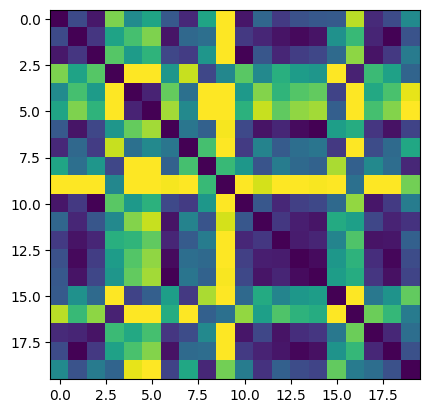

In [95]:
image = rec_plot(test)
plt.imshow(image)
plt.show()

In [34]:
data[0].shape

torch.Size([32, 16, 4])

In [35]:
# data :: bbox(4), flow(2), ego(3)

storage = torch.zeros((data[0].shape[0], data[0].shape[1], data[0].shape[1], 9)).to('cuda')

In [36]:
from utils.recurrence import rec_plot

In [38]:
for batch in range(data[0].shape[0]):
    storage[batch, :, :, 0] = torch.tensor(rec_plot(data[0][batch, :, 0].to('cpu').numpy()), dtype= torch.float32)
    storage[batch, :, :, 1] = torch.tensor(rec_plot(data[0][batch, :, 1].to('cpu').numpy()), dtype= torch.float32)
    storage[batch, :, :, 2] = torch.tensor(rec_plot(data[0][batch, :, 2].to('cpu').numpy()), dtype= torch.float32)
    storage[batch, :, :, 3] = torch.tensor(rec_plot(data[0][batch, :, 3].to('cpu').numpy()), dtype= torch.float32)

    storage[batch, :, :, 4] = torch.tensor(rec_plot(data[1][batch, :, 5//2, 5//2, 0].to('cpu').numpy()), dtype= torch.float32)
    storage[batch, :, :, 5] = torch.tensor(rec_plot(data[1][batch, :, 5//2, 5//2, 1].to('cpu').numpy()), dtype= torch.float32)

    storage[batch, :, :, 6] = torch.tensor(rec_plot(data[2][batch, :, 0].to('cpu').numpy()), dtype= torch.float32)
    storage[batch, :, :, 7] = torch.tensor(rec_plot(data[2][batch, :, 1].to('cpu').numpy()), dtype= torch.float32)
    storage[batch, :, :, 8] = torch.tensor(rec_plot(data[2][batch, :, 2].to('cpu').numpy()), dtype= torch.float32)

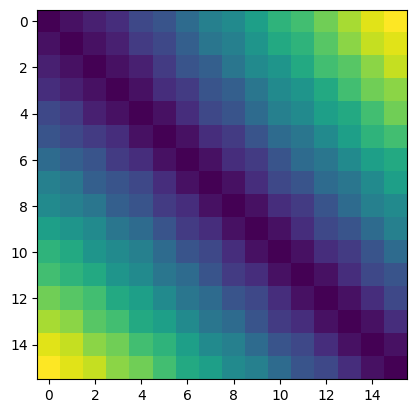

tensor([0.8600, 0.8485, 0.8350, 0.8203, 0.8063, 0.7901, 0.7731, 0.7551, 0.7407,
        0.7248, 0.7051, 0.6908, 0.6738, 0.6576, 0.6380, 0.6232],
       device='cuda:0')


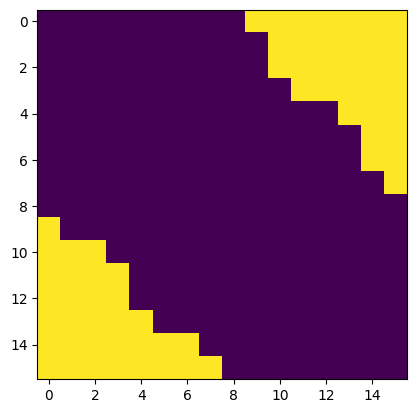

tensor([0.5809, 0.5821, 0.5819, 0.5828, 0.5842, 0.5857, 0.5868, 0.5882, 0.5902,
        0.5914, 0.5924, 0.5937, 0.5936, 0.5956, 0.5969, 0.5988],
       device='cuda:0')


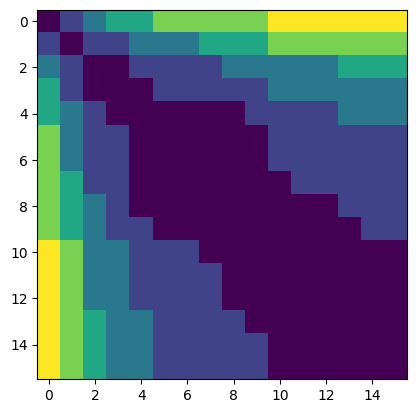

tensor([0.1093, 0.1208, 0.1346, 0.1401, 0.1454, 0.1507, 0.1507, 0.1525, 0.1551,
        0.1586, 0.1622, 0.1635, 0.1642, 0.1659, 0.1686, 0.1691],
       device='cuda:0')


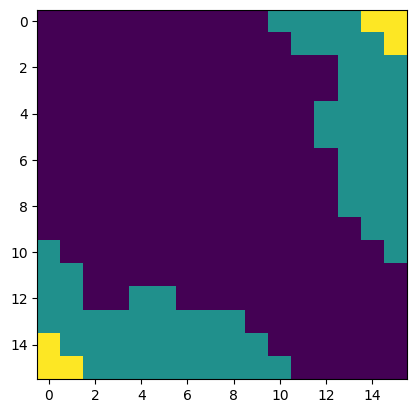

tensor([0.1245, 0.1272, 0.1308, 0.1303, 0.1295, 0.1297, 0.1304, 0.1309, 0.1307,
        0.1329, 0.1358, 0.1375, 0.1401, 0.1418, 0.1454, 0.1473],
       device='cuda:0')


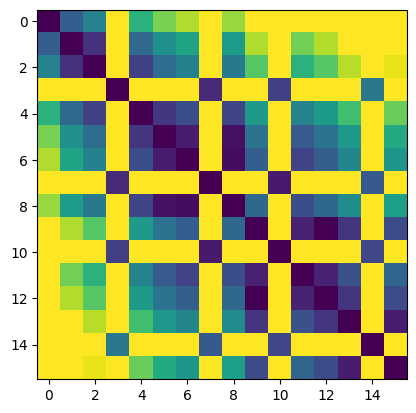

tensor([-19.2001, -19.9614, -20.3309, -13.8691, -20.8335, -21.2450, -21.4530,
        -14.1727, -21.3644, -22.2150, -14.3548, -21.9782, -22.2242, -22.6138,
        -14.8953, -22.8101], device='cuda:0')


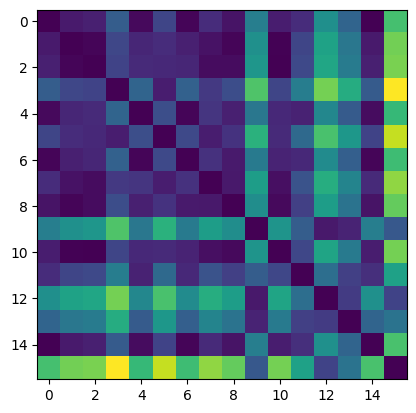

tensor([0.8147, 0.6996, 0.6768, 0.3720, 0.8619, 0.5011, 0.8395, 0.6226, 0.7270,
        1.4578, 0.6866, 1.0117, 1.5611, 1.2984, 0.8098, 1.8699],
       device='cuda:0')


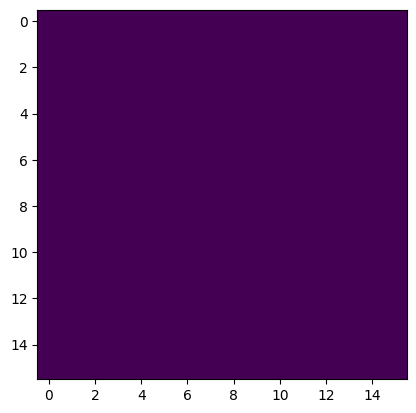

tensor([0.0080, 0.0080, 0.0080, 0.0080, 0.0080, 0.0080, 0.0080, 0.0080, 0.0070,
        0.0070, 0.0070, 0.0070, 0.0070, 0.0060, 0.0060, 0.0060],
       device='cuda:0')


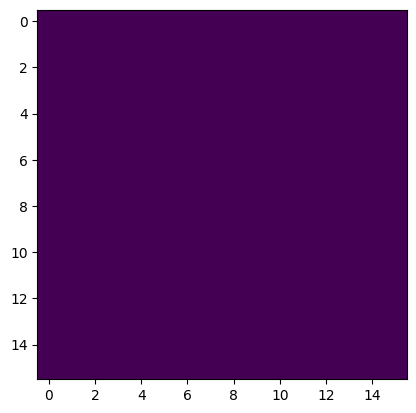

tensor([0.3120, 0.3120, 0.3120, 0.3120, 0.3120, 0.3120, 0.3120, 0.3120, 0.3120,
        0.3110, 0.3110, 0.3100, 0.3100, 0.3100, 0.3090, 0.3090],
       device='cuda:0')


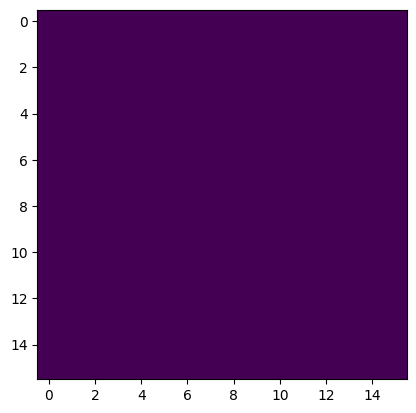

tensor([0.7770, 0.7770, 0.7770, 0.7770, 0.7770, 0.7770, 0.7770, 0.7760, 0.7750,
        0.7750, 0.7740, 0.7730, 0.7720, 0.7710, 0.7710, 0.7700],
       device='cuda:0')


In [39]:
plt.imshow(storage[0,:,:,0].to('cpu'))
plt.show()
print(data[0][0,:,0])

plt.imshow(storage[0,:,:,1].to('cpu'))
plt.show()
print(data[0][0,:,1])

plt.imshow(storage[0,:,:,2].to('cpu'))
plt.show()
print(data[0][0,:,2])

plt.imshow(storage[0,:,:,3].to('cpu'))
plt.show()
print(data[0][0,:,3])

plt.imshow(storage[0,:,:,4].to('cpu'))
plt.show()
print(data[1][0,:,5//2, 5//2, 0])

plt.imshow(storage[0,:,:,5].to('cpu'))
plt.show()
print(data[1][0,:,5//2, 5//2, 1])

plt.imshow(storage[0,:,:,6].to('cpu'))
plt.show()
print(data[2][0,:,0])

plt.imshow(storage[0,:,:,7].to('cpu'))
plt.show()
print(data[2][0,:,1])

plt.imshow(storage[0,:,:,8].to('cpu'))
plt.show()
print(data[2][0,:,2])

In [154]:
test = rec_plot(data[0][batch, :, 1].to('cpu').numpy())

In [155]:
test

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [156]:
storage.shape

torch.Size([32, 16, 16, 9])

In [52]:
import torch
from torch import nn
from config import model_config as cfg
import numpy as np
from utils.recurrence import rec_plot

class recurrence_autoencoder(nn.Module):
    """Some Information about recurrence_autoencoder"""
    def __init__(self):
        super(recurrence_autoencoder, self).__init__()

        # Flow(2) + BBox(4) + Ego(3) -> 9channel
        # 16 * 16 * 9 Image

        # 16*9 -> 16*16 -> 8*32 -> 4*64 -> 4*128
        self.encoder = nn.Sequential(
            #input = 16 * 16 * 9
            nn.Conv2d(9, 16, 3, padding = 'same'),
            nn.ReLU(),
            # result = 16 * 16 * 16

            #input = 16 * 16 * 16
            nn.Conv2d(16, 32, 3, padding = 'same'),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            # result = 8 * 8 * 32

            #input = 8 * 8 * 32
            nn.Conv2d(32, 64, 3, padding = 'same'),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            # result = 4 * 4 * 64
        
            #input = 4 * 4 * 64
            nn.Conv2d(64, 128, 3, padding = 'same'),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, return_indices= True)
            # result = 2 * 2 * 128
        )

        # 2 * 128 -> 4 * 64 -> 8 * 32 -> 16 * 16 -> 16 * 9
        self.a  = nn.ConvTranspose2d(128, 64, 3, padding = 'same')
        self.b = nn.ReLU()
        self.c = nn.ConvTranspose2d(64, 64, 3, 3, ) ## 어떻게 쓰는걸까?
        self.decoder = nn.Sequential(
            # input = 2 * 2 * 128
            #nn.Conv2d(128, 64, 3, padding = 'same'),
            #nn.ReLU(),
            #nn.MaxUnpool2d(2, 2),
            # result = 4 * 4 * 64

            # input = 2 * 2 * 128
            nn.Conv2d(64, 32, 3, padding = 'same'),
            nn.ReLU(),
            nn.MaxUnpool2d(2, 2),
            # result = 8 * 8 * 32

            # input = 8 * 8 * 32
            nn.Conv2d(32, 16, 3, padding = 'same'),
            nn.ReLU(),
            nn.MaxUnpool2d(2, 2),
            # result = 16 * 16 * 16

            # input = 16 * 16 * 16
            nn.Conv2d(16, 9, 3, padding = 'same', ),
            nn.ReLU()
            # result = 4 * 4 * 64

        )

    def forward(self, x):
        x = x.view(x.shape[0], x.shape[-1], x.shape[1], x.shape[2])
        feature, indices = self.encoder(x)

        feature = self.a(feature)
        feature = self.b(feature)
        feature = self.c(feature, indices = indices)
        
        result = self.decoder(feature)
        return result

In [53]:
model = recurrence_autoencoder()

In [54]:
model = model.to('cuda')

In [55]:
storage.shape

torch.Size([32, 16, 16, 9])

In [56]:
result = model(storage)

RuntimeError: Expected shape of indices to be: [32, 64, 2, 2] but got: [32, 128, 2, 2]

In [163]:
result.shape

torch.Size([32, 16, 16, 9])

In [165]:
loss = torch.nn.MSELoss()

In [166]:
loss_value = loss(result, storage)

In [169]:
for i in range(16):
    for j in range(16):
        print(result[0,i,j,0] - storage[0,i,j,0])

tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='cuda:0')
tensor(0., device='c

In [57]:
test = torch.randn((32, 16, 4, 4))

In [69]:
layer = nn.ConvTranspose2d(16, 8, 3, 1, padding= 0)

In [70]:
result = layer(test)

In [71]:
result.shape

torch.Size([32, 8, 6, 6])